In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the data

In [38]:
df_movies = pd.read_csv('data/cost_revenue_dirty.csv')

In [3]:
df_movies.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [4]:
df_movies.shape

(5391, 6)

In [5]:
df_movies.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


### Looking for NaN values

In [8]:
print(f'Number of NaN values in each column is:\n{df_movies.isna().sum()}')

Number of NaN values in each column is:
Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64


In [12]:
for column in df_movies.columns:
    print(f'Type of {column} column is {type(df_movies[column][0])}')

Type of Rank column is <class 'numpy.int64'>
Type of Release_Date column is <class 'str'>
Type of Movie_Title column is <class 'str'>
Type of USD_Production_Budget column is <class 'str'>
Type of USD_Worldwide_Gross column is <class 'str'>
Type of USD_Domestic_Gross column is <class 'str'>


In [15]:
print(f'Number of duplicated rows in data is: {df_movies.duplicated().sum()}')

Number of duplicated rows in data is: 0


In [25]:
print(type(int(''.join(df_movies['USD_Domestic_Gross'][0][1:].split(',')))))

<class 'int'>


In [28]:
df_movies.columns[-3:]

Index(['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross'], dtype='object')

### Cleaning and preparing data

In [40]:
# Using apply with lambda expression we convert str to new strings that can be converted by pd.to_numeric
df_movies['USD_Domestic_Gross'].apply(lambda string: ''.join(string[1:].split(',')))

0          110000
1          385907
2          200000
3          100000
4          245000
          ...    
5386     15000000
5387    160000000
5388    175000000
5389     50000000
5390     20000000
Name: USD_Production_Budget, Length: 5391, dtype: object

In [41]:
for column in df_movies.columns[-3:]:
    df_movies[column] = df_movies[column].apply(lambda string: ''.join(string[1:].split(',')))
    df_movies[column] = pd.to_numeric(df_movies[column], downcast='integer')
    print(type(df_movies[column][0]))

<class 'numpy.int32'>
<class 'numpy.int64'>
<class 'numpy.int32'>


In [42]:
df_movies[df_movies['USD_Production_Budget'] > df_movies['USD_Domestic_Gross']]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,5/9/1916,Intolerance,385907,0,0
6,4630,12/8/1927,Wings,2000000,0,0
8,4240,1/1/1930,Hell's Angels,4000000,0,0
15,4738,5/2/1936,Modern Times,1500000,165049,163245
17,4814,10/20/1936,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


In [44]:
datetime = pd.to_datetime(df_movies['Release_Date'], dayfirst=False)
datetime

0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5386   2018-10-08
5387   2018-12-18
5388   2020-12-31
5389   2020-12-31
5390   2020-12-31
Name: Release_Date, Length: 5391, dtype: datetime64[ns]

In [45]:
df_movies['Release_Date'] = datetime

In [46]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int32         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(2), object(1)
memory usage: 210.7+ KB


### Investigating data

#### Average production budget

In [52]:
print(f'Average production budget for movies in dataset is: ${int(df_movies["USD_Production_Budget"].mean())}')

Average production budget for movies in dataset is: $31113737


#### Average worldwide gross revenue

In [56]:
print(f'Average worldwide gross revenue is: ${int(df_movies["USD_Worldwide_Gross"].mean())}')

Average worldwide gross revenue is: $88855421


#### Minimum domestic and worldwide revenue

In [58]:
print(f'Minimum domestic and worldwide revenue are respectively: {df_movies["USD_Domestic_Gross"].min(), df_movies["USD_Worldwide_Gross"].min()}')

Minimum domestic and worldwide revenue are respectively: (0, 0)


#### Highest production budget and highest worldwide revenue

In [67]:
print(f'Highest production budget had {df_movies.iloc[df_movies["USD_Production_Budget"].idxmax()]}')

Highest production budget had Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Name: 3529, dtype: object


In [68]:
print(f'Highest worldwide revenue had {df_movies.iloc[df_movies["USD_Worldwide_Gross"].idxmax()]}')

Highest worldwide revenue had Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Name: 3529, dtype: object


#### How much revenue did the lowest and highest budget films make

In [69]:
highes_budget = df_movies['USD_Production_Budget'].idxmax()
lowest_budget = df_movies['USD_Production_Budget'].idxmin()
print(f'Highest budget movie made ${df_movies["USD_Worldwide_Gross"].iloc[highes_budget]}')
print(f'Lowest budget movie made ${df_movies["USD_Worldwide_Gross"].iloc[lowest_budget]}')

Highest budget movie made $2783918982
Lowest budget movie made $181041


#### Number of films that grossed 0 worldwide

In [74]:
df_movies[df_movies['USD_Worldwide_Gross'] == 0].count()

Rank                     357
Release_Date             357
Movie_Title              357
USD_Production_Budget    357
USD_Worldwide_Gross      357
USD_Domestic_Gross       357
dtype: int64

#### Number of movies that domestic gross is zero but worldwide is not zero (using query function)

In [90]:
aux = df_movies.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of movies that domestic gross is zero but worldwide is not zero is: {len(aux)}')

Number of movies that domestic gross is zero but worldwide is not zero is: 155


#### Looking for movies released after May 1st 2018

In [93]:
after_may = pd.Timestamp('2018-05-01')
after_may
df_movies[df_movies['Release_Date'] >= after_may]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [94]:
data_clean = df_movies[df_movies['Release_Date'] < after_may]

In [97]:
print(f'Sizes of new and old data frames are respectively: {data_clean.shape, df_movies.shape}')

Sizes of new and old data frames are respectively: ((5384, 6), (5391, 6))


#### Looking for movies that costs exceed worldwide gross

In [103]:
costs = len(data_clean[data_clean["USD_Production_Budget"] > data_clean["USD_Worldwide_Gross"]])
print(f'Percentage of movies that costs exceed worldwide gross is:{(costs/data_clean.shape[0])*100: .2f}%')

Percentage of movies that costs exceed worldwide gross is: 37.28%


### Visualising the data

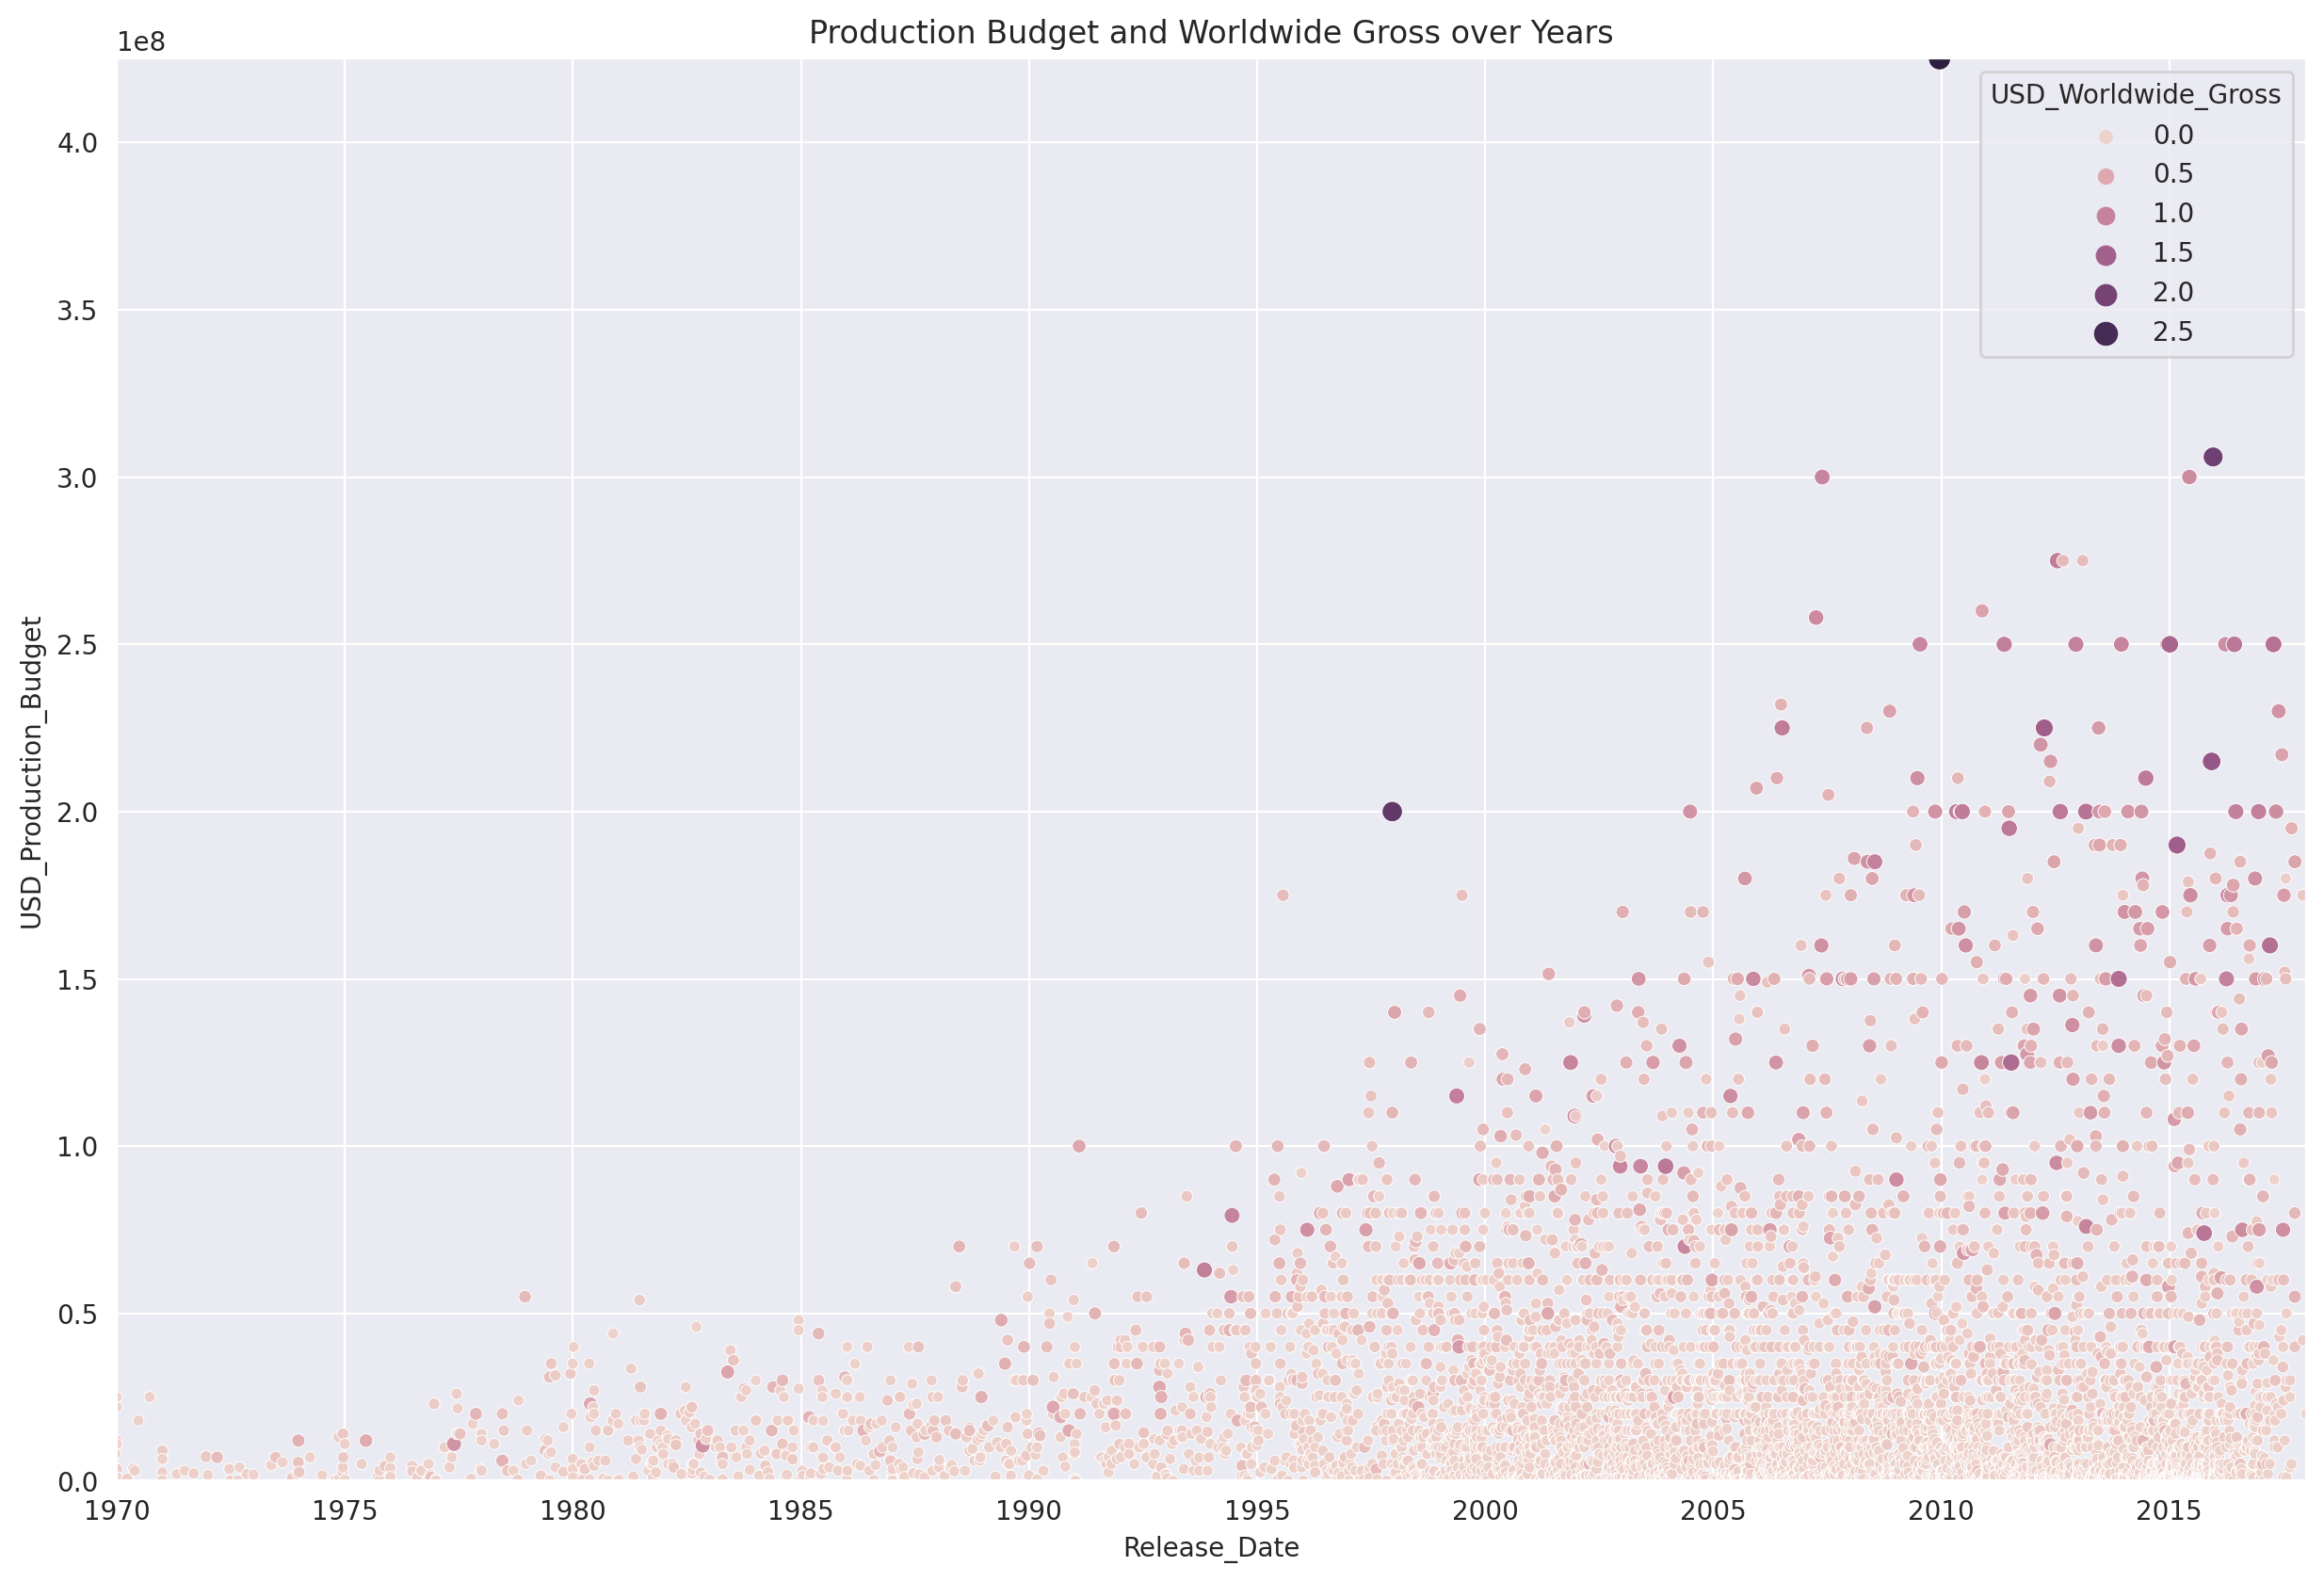

In [116]:
plt.figure(figsize=(15,10), dpi=200)
with sns.axes_style('darkgrid'):
    axis = sns.scatterplot(x=data_clean['Release_Date'], y=data_clean['USD_Production_Budget'],\
                       hue=data_clean['USD_Worldwide_Gross'], size=data_clean['USD_Worldwide_Gross'])
    axis.set(title='Production Budget and Worldwide Gross over Years',
            xlim=(0,data_clean['Release_Date'].max()), ylim=(0, data_clean['USD_Production_Budget'].max() + 10))

### Adding decade column to data_clean

In [134]:
def decade_convert(element):
    return (element // 10)*10
data_clean.assign(Decade=decade_convert(pd.DatetimeIndex(data_clean['Release_Date']).year))

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade,Decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920,1920
...,...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010,2010


In [139]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5384 entries, 0 to 5383
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5384 non-null   int64         
 1   Release_Date           5384 non-null   datetime64[ns]
 2   Movie_Title            5384 non-null   object        
 3   USD_Production_Budget  5384 non-null   int32         
 4   USD_Worldwide_Gross    5384 non-null   int64         
 5   USD_Domestic_Gross     5384 non-null   int32         
 6   Decade                 5384 non-null   int64         
dtypes: datetime64[ns](1), int32(2), int64(3), object(1)
memory usage: 423.5+ KB


### Creating new data frames for movies before and after 1970

In [141]:
old_movies, new_movies = data_clean[data_clean['Decade'] <= 1970], data_clean[data_clean['Decade'] > 1970]

In [143]:
print(len(old_movies), len(new_movies))

262 5122
